<a href="https://colab.research.google.com/github/adityapatil4141/YouTube-channel-analytics/blob/main/YouTube_channel_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Getting started

In [ ]:
# Importing libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Mounting google drive:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Content Analytics


In [ ]:
# Import dataset in notebook:

df = pd.read_csv("/content/drive/MyDrive/work files /YouTube analytics/Table data.csv")


In [ ]:
# Dataset view:

df.head()

,Content,Video title,Video publish time,Views,Watch time (hours),Subscribers,Estimated revenue (INR),Average view duration,Impressions,Impressions click-through rate (%)
0,Total,NaN,NaN,28630541.0,1.175456e+06,125166.0,696531.733,0:02:27,297319169.0,8.29
1,H0zPdeB8R6U,"पुणे मध्ये या ठिकाणी मिळतील जाते, खलबत्ता, वाट...","Jul 1, 2022",1013185.0,2.592474e+04,4854.0,15544.911,0:01:32,9658308.0,9.83
2,qDvrCOOilmY,पुणे मधील सगळ्यात मोठे होलसेल गणपती डेकोरेशन म...,"Aug 2, 2022",683897.0,2.188941e+04,2772.0,16310.607,0:01:55,8542671.0,7.30
3,wWwARt_tu8E,पुण्यात या ठिकाणी मिळतील विविध प्रकारच्या व्या...,"Jan 28, 2023",639396.0,3.056139e+04,7375.0,18639.696,0:02:52,10399785.0,5.38
4,OxBoJ8vH4K4,होलेसेल ज्वेलरी शॉप पुणे | Cheapest jewellery ...,"Apr 27, 2022",523070.0,1.558760e+04,3147.0,14869.025,0:01:47,7479874.0,6.40


In [ ]:
# Null values from the dataset:

df.isnull().sum()

Content                               0
Video title                           2
Video publish time                    2
Views                                 1
Watch time (hours)                    1
Subscribers                           1
Estimated revenue (INR)               2
Average view duration                 1
Impressions                           1
Impressions click-through rate (%)    1
dtype: int64

In [ ]:
# Duplicated values in the dataset:

df.duplicated().sum()

0

In [ ]:
# Installinf googletrans in notebook:

!pip install googletrans==4.0.0-rc1

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 31.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 9.9 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17396 sha256=09242d6ad54aa494cf98a94d3cad8cb253cbbbff7f1c1d1f90e5f0ccc01ba3f1
  Stored in directory: /root/.cache/pip/wheels/c0/59/9f/7372f0cf70160fe61b528532e1a7c8498c4becd6bcffb022de
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling

 As our dataset has text in marathi language we will convert in into english text, because english text will make it easier to do analysis and video title column is an important column in our dataset:

In [ ]:
# Creating a function which will convert marathi text in english text:

from googletrans import Translator
def marathi_to_english(text):
  translator = Translator()
  translated_text = translator.translate(text,src='mr',dest='en')
  return translated_text.text



In [ ]:
# Applying function on the column:

df['English title'] = df['Video title'].apply(marathi_to_english)

In [ ]:
# Dataset new view:

df.head()

,Content,Video title,Video publish time,Views,Watch time (hours),Subscribers,Estimated revenue (INR),Average view duration,Impressions,Impressions click-through rate (%),English title
0,Total,NaN,NaN,28630541.0,1.175456e+06,125166.0,696531.733,0:02:27,297319169.0,8.29,Nan
1,H0zPdeB8R6U,"पुणे मध्ये या ठिकाणी मिळतील जाते, खलबत्ता, वाट...","Jul 1, 2022",1013185.0,2.592474e+04,4854.0,15544.911,0:01:32,9658308.0,9.83,"In Pune, this place will be available, Khapatt..."
2,qDvrCOOilmY,पुणे मधील सगळ्यात मोठे होलसेल गणपती डेकोरेशन म...,"Aug 2, 2022",683897.0,2.188941e+04,2772.0,16310.607,0:01:55,8542671.0,7.30,"Ganapati Decorating Market, the largest wholes..."
3,wWwARt_tu8E,पुण्यात या ठिकाणी मिळतील विविध प्रकारच्या व्या...,"Jan 28, 2023",639396.0,3.056139e+04,7375.0,18639.696,0:02:52,10399785.0,5.38,Different types of commercial machines can be ...
4,OxBoJ8vH4K4,होलेसेल ज्वेलरी शॉप पुणे | Cheapest jewellery ...,"Apr 27, 2022",523070.0,1.558760e+04,3147.0,14869.025,0:01:47,7479874.0,6.40,Holiday Jewelry Shop Pune |Chepest jewellery m...


In [ ]:
# Dataset shape:

df.shape

(502, 11)

In [ ]:
# Dataset new view:

df.head()

,Content,Video title,Video publish time,Views,Watch time (hours),Subscribers,Estimated revenue (INR),Average view duration,Impressions,Impressions click-through rate (%),English title
0,Total,NaN,NaN,28630541.0,1.175456e+06,125166.0,696531.733,0:02:27,297319169.0,8.29,Nan
1,H0zPdeB8R6U,"पुणे मध्ये या ठिकाणी मिळतील जाते, खलबत्ता, वाट...","Jul 1, 2022",1013185.0,2.592474e+04,4854.0,15544.911,0:01:32,9658308.0,9.83,"In Pune, this place will be available, Khapatt..."
2,qDvrCOOilmY,पुणे मधील सगळ्यात मोठे होलसेल गणपती डेकोरेशन म...,"Aug 2, 2022",683897.0,2.188941e+04,2772.0,16310.607,0:01:55,8542671.0,7.30,"Ganapati Decorating Market, the largest wholes..."
3,wWwARt_tu8E,पुण्यात या ठिकाणी मिळतील विविध प्रकारच्या व्या...,"Jan 28, 2023",639396.0,3.056139e+04,7375.0,18639.696,0:02:52,10399785.0,5.38,Different types of commercial machines can be ...
4,OxBoJ8vH4K4,होलेसेल ज्वेलरी शॉप पुणे | Cheapest jewellery ...,"Apr 27, 2022",523070.0,1.558760e+04,3147.0,14869.025,0:01:47,7479874.0,6.40,Holiday Jewelry Shop Pune |Chepest jewellery m...


In [ ]:
# Dataset information:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Content                             502 non-null    object 
 1   Video title                         500 non-null    object 
 2   Video publish time                  500 non-null    object 
 3   Views                               501 non-null    float64
 4   Watch time (hours)                  501 non-null    float64
 5   Subscribers                         501 non-null    float64
 6   Estimated revenue (INR)             500 non-null    float64
 7   Average view duration               501 non-null    object 
 8   Impressions                         501 non-null    float64
 9   Impressions click-through rate (%)  501 non-null    float64
 10  English title                       502 non-null    object 
dtypes: float64(6), object(5)
memory usage: 43.3+ 

In [ ]:
# Dropping null values from the dataset:

df.dropna(inplace=True)

In [ ]:
# Convering watch time column values in appropriate and readable format:

df['Watch time (hours)'] = df['Watch time (hours)'].apply(lambda x: '{:.0f}'.format(x))

In [ ]:
# Converting watch time column in numeric datatype:

df['Watch time (hours)'] = pd.to_numeric(df['Watch time (hours)'])

In [ ]:
# Dataset new view:

df.head()

,Content,Video title,Video publish time,Views,Watch time (hours),Subscribers,Estimated revenue (INR),Average view duration,Impressions,Impressions click-through rate (%),English title
1,H0zPdeB8R6U,"पुणे मध्ये या ठिकाणी मिळतील जाते, खलबत्ता, वाट...","Jul 1, 2022",1013185.0,25925,4854.0,15544.911,0:01:32,9658308.0,9.83,"In Pune, this place will be available, Khapatt..."
2,qDvrCOOilmY,पुणे मधील सगळ्यात मोठे होलसेल गणपती डेकोरेशन म...,"Aug 2, 2022",683897.0,21889,2772.0,16310.607,0:01:55,8542671.0,7.30,"Ganapati Decorating Market, the largest wholes..."
3,wWwARt_tu8E,पुण्यात या ठिकाणी मिळतील विविध प्रकारच्या व्या...,"Jan 28, 2023",639396.0,30561,7375.0,18639.696,0:02:52,10399785.0,5.38,Different types of commercial machines can be ...
4,OxBoJ8vH4K4,होलेसेल ज्वेलरी शॉप पुणे | Cheapest jewellery ...,"Apr 27, 2022",523070.0,15588,3147.0,14869.025,0:01:47,7479874.0,6.40,Holiday Jewelry Shop Pune |Chepest jewellery m...
5,-zPPPXA_1cY,ड्रायफ्रूट आणि मसाल्यांचे पुण्यातील प्रसिद्द आ...,"Apr 12, 2023",520340.0,27874,3676.0,12058.536,0:03:12,5665672.0,8.28,Dryfruit and spices famous and true wholesale ...


In [ ]:
# Renaming columns:

df.rename(columns={'Video publish time':'Publish date'},inplace=True)

In [ ]:
# Coverting Publish date in datetime format:

df['Publish date'] = pd.to_datetime(df['Publish date'])

In [ ]:
# Rearranging column in the dataframe for easy understanding:

df = df[['Content','Video title','English title','Publish date','Views','Watch time (hours)','Average view duration','Estimated revenue (INR)','Subscribers','Impressions','Impressions click-through rate (%)']]

In [ ]:
# dataset updated view

df.head()

,Content,Video title,English title,Publish date,Views,Watch time (hours),Average view duration,Estimated revenue (INR),Subscribers,Impressions,Impressions click-through rate (%)
1,H0zPdeB8R6U,"पुणे मध्ये या ठिकाणी मिळतील जाते, खलबत्ता, वाट...","In Pune, this place will be available, Khapatt...",2022-07-01,1013185.0,25925,0:01:32,15544.911,4854.0,9658308.0,9.83
2,qDvrCOOilmY,पुणे मधील सगळ्यात मोठे होलसेल गणपती डेकोरेशन म...,"Ganapati Decorating Market, the largest wholes...",2022-08-02,683897.0,21889,0:01:55,16310.607,2772.0,8542671.0,7.30
3,wWwARt_tu8E,पुण्यात या ठिकाणी मिळतील विविध प्रकारच्या व्या...,Different types of commercial machines can be ...,2023-01-28,639396.0,30561,0:02:52,18639.696,7375.0,10399785.0,5.38
4,OxBoJ8vH4K4,होलेसेल ज्वेलरी शॉप पुणे | Cheapest jewellery ...,Holiday Jewelry Shop Pune |Chepest jewellery m...,2022-04-27,523070.0,15588,0:01:47,14869.025,3147.0,7479874.0,6.40
5,-zPPPXA_1cY,ड्रायफ्रूट आणि मसाल्यांचे पुण्यातील प्रसिद्द आ...,Dryfruit and spices famous and true wholesale ...,2023-04-12,520340.0,27874,0:03:12,12058.536,3676.0,5665672.0,8.28


In [ ]:
# Adding new column in dataframe for visualization:

df['Publish_year'] = df['Publish date'].dt.year
df['Publish_month'] = df['Publish date'].dt.month
df['Publish_day'] = df['Publish date'].dt.day

In [ ]:
# Dataset new view:

df.head()

,Content,Video title,English title,Publish date,Views,Watch time (hours),Average view duration,Estimated revenue (INR),Subscribers,Impressions,Impressions click-through rate (%),Publish_year,Publish_month,Publish_day
1,H0zPdeB8R6U,"पुणे मध्ये या ठिकाणी मिळतील जाते, खलबत्ता, वाट...","In Pune, this place will be available, Khapatt...",2022-07-01,1013185.0,25925,0:01:32,15544.911,4854.0,9658308.0,9.83,2022,7,1
2,qDvrCOOilmY,पुणे मधील सगळ्यात मोठे होलसेल गणपती डेकोरेशन म...,"Ganapati Decorating Market, the largest wholes...",2022-08-02,683897.0,21889,0:01:55,16310.607,2772.0,8542671.0,7.30,2022,8,2
3,wWwARt_tu8E,पुण्यात या ठिकाणी मिळतील विविध प्रकारच्या व्या...,Different types of commercial machines can be ...,2023-01-28,639396.0,30561,0:02:52,18639.696,7375.0,10399785.0,5.38,2023,1,28
4,OxBoJ8vH4K4,होलेसेल ज्वेलरी शॉप पुणे | Cheapest jewellery ...,Holiday Jewelry Shop Pune |Chepest jewellery m...,2022-04-27,523070.0,15588,0:01:47,14869.025,3147.0,7479874.0,6.40,2022,4,27
5,-zPPPXA_1cY,ड्रायफ्रूट आणि मसाल्यांचे पुण्यातील प्रसिद्द आ...,Dryfruit and spices famous and true wholesale ...,2023-04-12,520340.0,27874,0:03:12,12058.536,3676.0,5665672.0,8.28,2023,4,12


In [ ]:
# grouping by publish year with sum of views:

view_year = df.groupby('Publish_year')['Views'].sum()

Text(0, 0.5, 'Views')

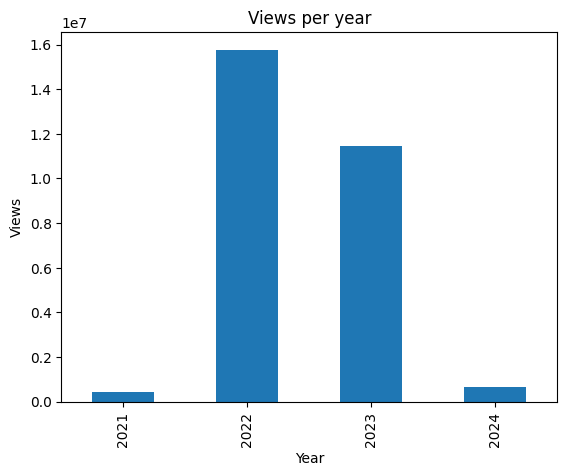

In [ ]:
# Plotting bar plot :

view_year.plot(kind='bar')
plt.title('Views per year')
plt.xlabel('Year')
plt.ylabel('Views')

We can see that year 2022 has the highest number of views followed by year 2023:
after year 2021, channel views grown exponentially reason may be some videos may have gone viral.

In [ ]:
# Videos which led to channels instant growth:

viral_video = df.groupby(['Video title','Publish_year','Content'])['Views'].sum().sort_values(ascending=False).reset_index().set_index('Video title').head()
viral_video

,Publish_year,Content,Views
Video title,,,
"पुणे मध्ये या ठिकाणी मिळतील जाते, खलबत्ता, वाटणपाट, दगडी दिवा इ. स्वस्त दरात #marketnmuchmore #pune",2022,H0zPdeB8R6U,1013185.0
पुणे मधील सगळ्यात मोठे होलसेल गणपती डेकोरेशन मार्केट पुणे | Biggest Ganapati Decoration Market PUNE,2022,qDvrCOOilmY,683897.0
पुण्यात या ठिकाणी मिळतील विविध प्रकारच्या व्यावसायिक मशीन #marketnmuchmore #punemarket #pune,2023,wWwARt_tu8E,639396.0
होलेसेल ज्वेलरी शॉप पुणे | Cheapest jewellery market pune #pune #punemarket #puneshopping,2022,OxBoJ8vH4K4,523070.0
ड्रायफ्रूट आणि मसाल्यांचे पुण्यातील प्रसिद्द आणि खरे होलसेल व्यापारी |Wholesale Dryfruit Market Pune,2023,-zPPPXA_1cY,520340.0


In [ ]:
# Click-through rate formula:

df['CTR'] = df['Views']/df['Impressions'] *100

In [ ]:
# Highest CTR

df['CTR'].max()

185.56217071131394

In [ ]:
df.iloc[30]

Content                                                                     Bxe8q9EzxIE
Video title                           🔴 Best Ladies Shopee Hadapsar Pune / महिलांसाठ...
English title                         L Best Ladies Shopee Hadapsar Pune / All Purch...
Publish date                                                        2023-07-22 00:00:00
Views                                                                          184202.0
Watch time (hours)                                                                 3606
Average view duration                                                           0:01:10
Estimated revenue (INR)                                                        3842.371
Subscribers                                                                       950.0
Impressions                                                                     99267.0
Impressions click-through rate (%)                                                 8.39
Publish_year                    

In [ ]:
# Function to remove emojis:

import re
def remove_emojis(text):
    # Remove emojis using a regular expression
    return re.sub(r'[\U00010000-\U0010ffff]', '', text)

In [ ]:
# Applying function:

df['Video title'] = df['Video title'].apply(remove_emojis)

In [ ]:
# Fetching row with maximum CTR:

max_ctr_video = df[df['CTR']==df['CTR'].max()]

In [ ]:
# Printing row:

max_ctr_video

,Content,Video title,English title,Publish date,Views,Watch time (hours),Average view duration,Estimated revenue (INR),Subscribers,Impressions,Impressions click-through rate (%),Publish_year,Publish_month,Publish_day,CTR
31,Bxe8q9EzxIE,Best Ladies Shopee Hadapsar Pune / महिलांसाठी...,L Best Ladies Shopee Hadapsar Pune / All Purch...,2023-07-22,184202.0,3606,0:01:10,3842.371,950.0,99267.0,8.39,2023,7,22,185.562171


In [ ]:
# Top 5 video with highest CTR :

top_ctr = df.nlargest(5,'CTR')
top_ctr_title = top_ctr['Content']
top_ctr = top_ctr['CTR']

In [ ]:
# Highest CTR in series:

top_ctr

31     185.562171
38      60.594417
377     50.653610
145     48.668487
483     35.903597
Name: CTR, dtype: float64

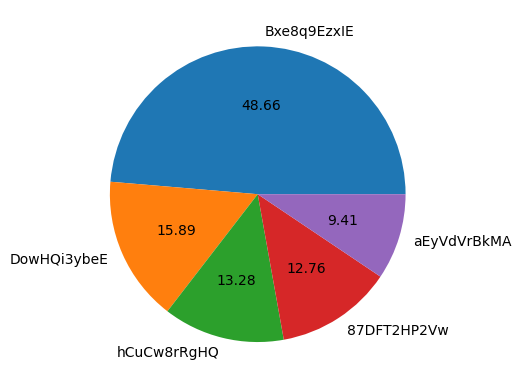

In [ ]:
# Pie chart of CTR:

plt.pie(top_ctr,autopct='%.2f',labels=top_ctr_title)
plt.show()

In [ ]:
titles = df[df['Content'].isin(top_ctr_title)][['Content', 'Video title','CTR']]
titles

# Below are the video title which has the highest CTR, reason must be thumbnail quality as content.

,Content,Video title,CTR
31,Bxe8q9EzxIE,Best Ladies Shopee Hadapsar Pune / महिलांसाठी...,185.562171
38,DowHQi3ybeE,"हडपसर मधील लेडीज शूज,बॅग्स,ज्वेलरी चे खूप मोठे...",60.594417
145,87DFT2HP2Vw,"ज्वेलरी,फुटवेअर,कॉसमेटिक्स,पर्स इ. चे हडपसर मध...",48.668487
377,hCuCw8rRgHQ,Tulsibaug market pune || tulsibaug street shop...,50.653610
483,aEyVdVrBkMA,MG Road Pune || best place for street shopping...,35.903597


Above are the videos that have the highest CTR(click through rate)

In [ ]:
# month wise views count:
month_views = df.groupby('Publish_month')['Views'].sum()
month_views

Publish_month
1     2869036.0
2     1650165.0
3     1694697.0
4     4105786.0
5     2823414.0
6     1417157.0
7     3682403.0
8     3126066.0
9      928728.0
10    1450447.0
11    2894651.0
12    1627853.0
Name: Views, dtype: float64

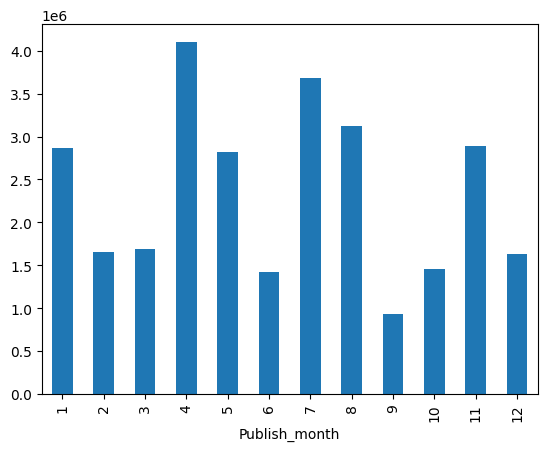

In [ ]:
# Month wise views chart
month_views.plot(kind='bar')
plt.show()

In [ ]:
# views wise top performing videos wrt year and month:

monthwise_videos = df.groupby(['Publish_year','Publish_month','Video title'])['Views'].sum().sort_values(ascending=False).reset_index().head(12)
monthwise_videos

,Publish_year,Publish_month,Video title,Views
0,2022,7,"पुणे मध्ये या ठिकाणी मिळतील जाते, खलबत्ता, वाट...",1013185.0
1,2022,8,पुणे मधील सगळ्यात मोठे होलसेल गणपती डेकोरेशन म...,683897.0
2,2023,1,पुण्यात या ठिकाणी मिळतील विविध प्रकारच्या व्या...,639396.0
3,2022,4,होलेसेल ज्वेलरी शॉप पुणे | Cheapest jewellery ...,523070.0
4,2023,4,ड्रायफ्रूट आणि मसाल्यांचे पुण्यातील प्रसिद्द आ...,520340.0
5,2022,5,पितळेच्या वस्तू आणि हॅन्डीक्राफ्ट च्या वस्तुचे...,512680.0
6,2023,1,किचन मध्ये वापरायच्या लाकडी वस्तू आणि लाकडी खे...,455582.0
7,2022,4,होलसेल रेडीमेड ब्लॉऊस शॉप पुणे | wholesale des...,454907.0
8,2023,7,अधिक मास स्पेशियल जोडवी मोहत्सव शुद्ध चांदीचे...,429354.0
9,2023,4,"कुर्ती, ड्रेस,प्लाझो, लेगिन्स,दुप्पटा इ. चे हो...",423559.0


In [ ]:
# Year and month wise views:

year_month_views = df.groupby(['Publish_year','Publish_month'])['Views'].sum()
year_month_views

Publish_year  Publish_month
2021          2                   6583.0
              5                   6484.0
              9                  12496.0
              10                 30704.0
              11                294896.0
              12                 64660.0
2022          1                 440083.0
              2                 690692.0
              3                 618382.0
              4                2475196.0
              5                1936335.0
              6                1063222.0
              7                2541682.0
              8                2191460.0
              9                 622885.0
              10                620580.0
              11               1674713.0
              12                896487.0
2023          1                1882673.0
              2                 846248.0
              3                1076315.0
              4                1630590.0
              5                 880595.0
              6              

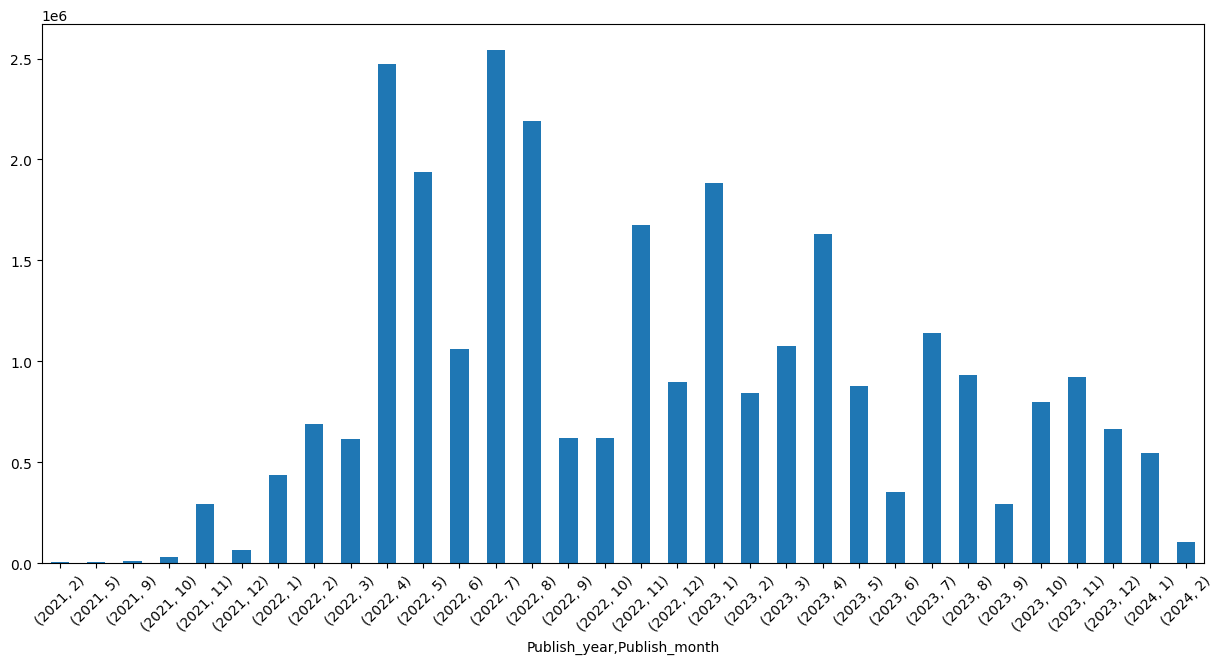

In [ ]:
# Plot:

plt.figure(figsize=(15,7))
year_month_views.plot(kind='bar')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# From above observations we can conclude that any years 4th ,7th and 8th month make a signficant impact on channels views.

In [ ]:
# Year and month wise subscribers gain:

year_month_subs = df.groupby(['Publish_year','Publish_month'])['Subscribers'].sum()
year_month_subs

Publish_year  Publish_month
2021          2                   30.0
              5                   79.0
              9                   51.0
              10                 104.0
              11                1097.0
              12                 231.0
2022          1                 2812.0
              2                 2984.0
              3                 3603.0
              4                14521.0
              5                11357.0
              6                 3968.0
              7                10861.0
              8                 9110.0
              9                 2292.0
              10                1805.0
              11                5972.0
              12                3014.0
2023          1                14371.0
              2                 3290.0
              3                 3951.0
              4                 8181.0
              5                 3138.0
              6                  729.0
              7                 3198

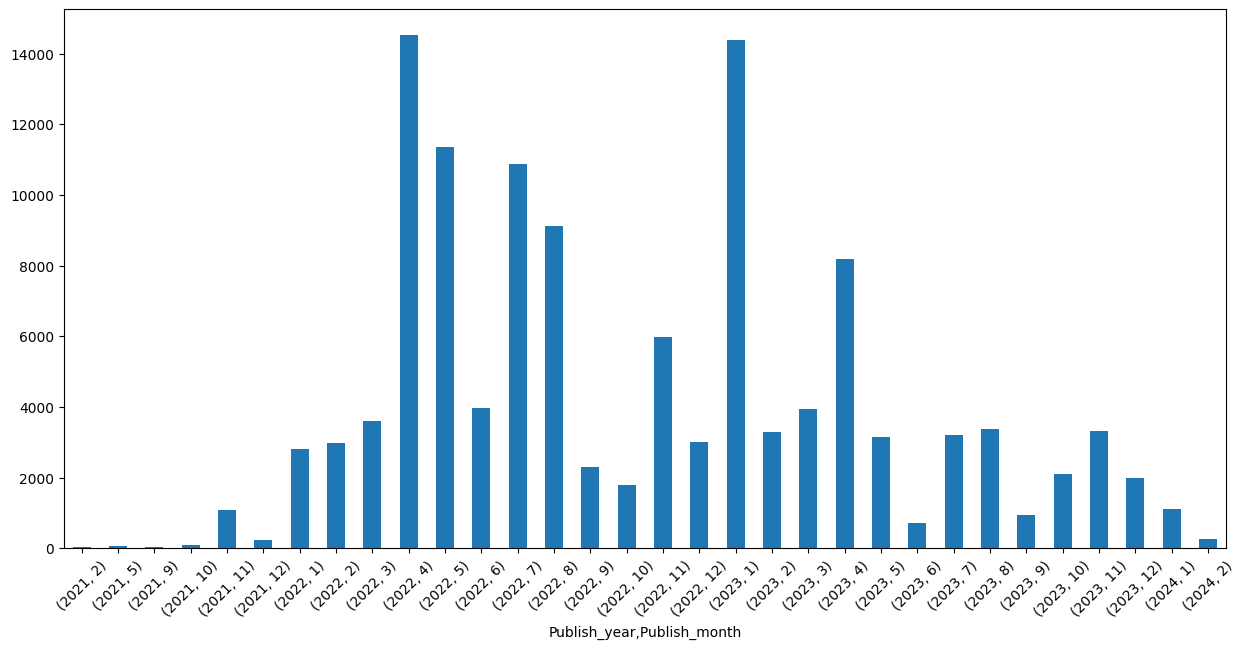

In [ ]:
# Visualization:

plt.figure(figsize=(15,7))
year_month_subs.plot(kind='bar')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# From above observation we can conclude that any years 1st,4th,7th & 8th month gains highest suscribers.
# We can conclude that majority people suscribe after watching videos.

In [ ]:
# Top 5 videos with highest no. of views :

top_videos_views = df.groupby('Video title')['Views'].sum().sort_values(ascending=False).reset_index().set_index('Video title').head()
top_videos_views

,Views
Video title,
"पुणे मध्ये या ठिकाणी मिळतील जाते, खलबत्ता, वाटणपाट, दगडी दिवा इ. स्वस्त दरात #marketnmuchmore #pune",1013185.0
पुणे मधील सगळ्यात मोठे होलसेल गणपती डेकोरेशन मार्केट पुणे | Biggest Ganapati Decoration Market PUNE,683897.0
पुण्यात या ठिकाणी मिळतील विविध प्रकारच्या व्यावसायिक मशीन #marketnmuchmore #punemarket #pune,639396.0
होलेसेल ज्वेलरी शॉप पुणे | Cheapest jewellery market pune #pune #punemarket #puneshopping,523070.0
ड्रायफ्रूट आणि मसाल्यांचे पुण्यातील प्रसिद्द आणि खरे होलसेल व्यापारी |Wholesale Dryfruit Market Pune,520340.0


In [ ]:
# Top 5 videos which generated highest revenue:
highest_revenue = df.groupby('Video title')['Estimated revenue (INR)'].sum().sort_values(ascending=False).reset_index().set_index('Video title').head()
highest_revenue

,Estimated revenue (INR)
Video title,
पुण्यात या ठिकाणी मिळतील विविध प्रकारच्या व्यावसायिक मशीन #marketnmuchmore #punemarket #pune,18639.696
पुणे मधील सगळ्यात मोठे होलसेल गणपती डेकोरेशन मार्केट पुणे | Biggest Ganapati Decoration Market PUNE,16310.607
पितळेच्या वस्तू आणि हॅन्डीक्राफ्ट च्या वस्तुचे होलसेल शॉप पुणे #मुर्ति #punemarket #marketnmuchmore,16309.379
"पुणे मध्ये या ठिकाणी मिळतील जाते, खलबत्ता, वाटणपाट, दगडी दिवा इ. स्वस्त दरात #marketnmuchmore #pune",15544.911
होलेसेल ज्वेलरी शॉप पुणे | Cheapest jewellery market pune #pune #punemarket #puneshopping,14869.025


In [ ]:
# Top 5 videos with highest watch time:

highest_watch_time = df.groupby('Video title')['Watch time (hours)'].sum().sort_values(ascending=False).reset_index().set_index('Video title').head()
highest_watch_time

,Watch time (hours)
Video title,
पुण्यात या ठिकाणी मिळतील विविध प्रकारच्या व्यावसायिक मशीन #marketnmuchmore #punemarket #pune,30561
ड्रायफ्रूट आणि मसाल्यांचे पुण्यातील प्रसिद्द आणि खरे होलसेल व्यापारी |Wholesale Dryfruit Market Pune,27874
किचन मध्ये वापरायच्या लाकडी वस्तू आणि लाकडी खेळणी चे व्यापारी#woodenkitchentools #marketnmuchmore,27569
"पुणे मध्ये या ठिकाणी मिळतील जाते, खलबत्ता, वाटणपाट, दगडी दिवा इ. स्वस्त दरात #marketnmuchmore #pune",25925
पुण्यातील सगळ्यात स्वस्त फर्निचर मार्केट / Cheapest Furniture Market In Pune #cheapestfurniture✨,22013


In [ ]:
# Top 5 videos with highest avg. view duration:

highest_avg_watch = df.groupby('Video title')['Average view duration'].sum().sort_values(ascending= False).reset_index().set_index('Video title').head()
highest_avg_watch

,Average view duration
Video title,
पुण्यातील सगळ्यात मोठे आणि बेस्ट फर्निचर शोरूम | Best & Antique Furniture @ Low Price #furniture,0:04:59
Wedding N Summer Special Saree Collection | होलसेल & रिटेल साडी शॉप #sareecollection #punemarket ♥️,0:04:25
पुण्यातील 100 वर्ष जुने साड्यांचे होलसेल व्यापारी | wholesale Saree Shop In Pune #wholesalesarees,0:04:24
"पितळेच्या मूर्ती, दिवे,समई, शोभेच्या पुरातन पितळी वस्तू इ. चे होलसेल आणि रिटेल शॉप पुणे #brassmurti",0:04:14
होलसेल साडी डेपो पुणे | Wholesale Saree Shop In Pune #marketnmuchmore #punemarket #saree,0:04:13


In [ ]:
# Top 5 videos which acquired highest subscribers:

video_subscribers = df.groupby('Video title')['Subscribers'].sum().sort_values(ascending=False).reset_index().set_index('Video title').head()
video_subscribers

,Subscribers
Video title,
पुण्यात या ठिकाणी मिळतील विविध प्रकारच्या व्यावसायिक मशीन #marketnmuchmore #punemarket #pune,7375.0
"पुणे मध्ये या ठिकाणी मिळतील जाते, खलबत्ता, वाटणपाट, दगडी दिवा इ. स्वस्त दरात #marketnmuchmore #pune",4854.0
ड्रायफ्रूट आणि मसाल्यांचे पुण्यातील प्रसिद्द आणि खरे होलसेल व्यापारी |Wholesale Dryfruit Market Pune,3676.0
पितळेच्या वस्तू आणि हॅन्डीक्राफ्ट च्या वस्तुचे होलसेल शॉप पुणे #मुर्ति #punemarket #marketnmuchmore,3590.0
होलेसेल ज्वेलरी शॉप पुणे | Cheapest jewellery market pune #pune #punemarket #puneshopping,3147.0


# Traffic Source Analysis

In [ ]:
# Data loading:

traffic = pd.read_csv("/content/drive/MyDrive/work files /YouTube analytics/Table data TRAFFIC.csv")

In [ ]:
# Data view:

traffic.head()

,Traffic source,Views,Watch time (hours),Average view duration,Impressions,Impressions click-through rate (%)
0,Total,1241569.0,49017.2105,0:02:22,11312918.0,7.98
1,Browse features,528637.0,20597.8581,0:02:20,4901015.0,10.12
2,Suggested videos,259536.0,17119.2620,0:03:57,4301575.0,5.34
3,YouTube search,150688.0,5337.3868,0:02:07,1400389.0,10.33
4,Shorts feed,149111.0,719.9208,0:00:17,NaN,NaN


In [ ]:
# Highest view count based on traffic source :

views_traffic = traffic.groupby('Traffic source')['Views'].sum().sort_values(ascending=False).reset_index().set_index('Traffic source').head(10)
views_traffic = views_traffic.drop('Total')
views_traffic

,Views
Traffic source,
Browse features,528637.0
Suggested videos,259536.0
YouTube search,150688.0
Shorts feed,149111.0
External,68607.0
Channel pages,30685.0
YouTube advertising,19352.0
Other YouTube features,14326.0
Playlists,8963.0


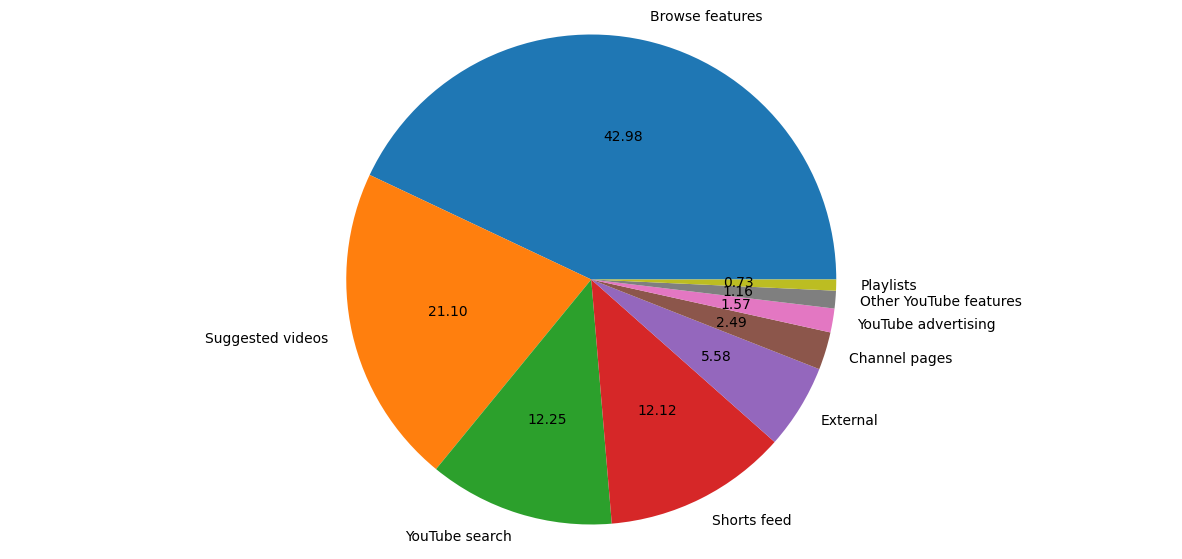

In [ ]:
# Plotting pie chart:

plt.figure(figsize=(15,7))
labels = views_traffic.index
plt.pie(views_traffic['Views'],autopct='%.2f',labels=labels)
plt.rcParams.update({'font.size': 10})
plt.axis('equal')

plt.show()

In [ ]:
# Most of channels views comes from Browse feature,suggested videos, YouTube search etc..

In [ ]:
# From which source do channel gets high watch time:

traffic_watch_time = traffic.groupby('Traffic source')['Watch time (hours)'].sum().sort_values(ascending=False).reset_index().set_index('Traffic source').head(10)
traffic_watch_time = traffic_watch_time.drop('Total')
traffic_watch_time

,Watch time (hours)
Traffic source,
Browse features,20597.8581
Suggested videos,17119.2620
YouTube search,5337.3868
External,2247.8870
Channel pages,970.4770
Other YouTube features,808.8250
Shorts feed,719.9208
Playlists,396.4590
YouTube advertising,341.9100


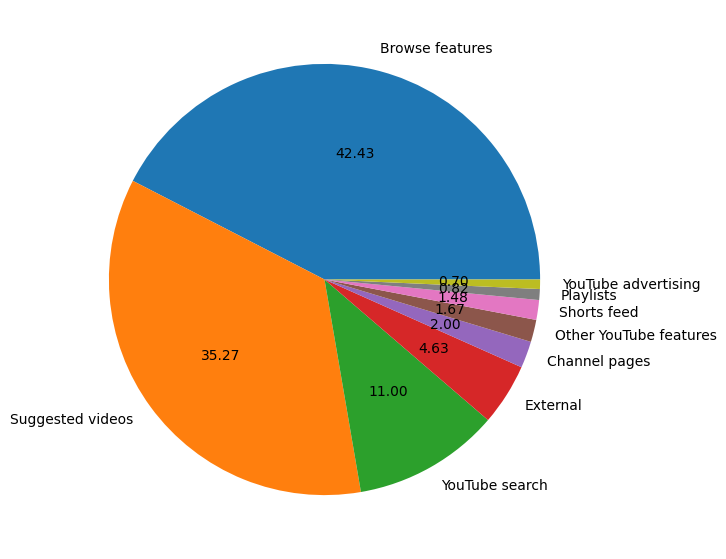

In [ ]:
# Pie Chart:

plt.figure(figsize=(15,7))
plt.pie(traffic_watch_time['Watch time (hours)'],autopct='%.2f',labels=traffic_watch_time.index)
plt.show()

In [ ]:
# Most of watch time is comming from Browse features,suggested videos, Youtube Search

In [ ]:
#Checking which traffic source gets highest CTR:

ctr_traffic = traffic.groupby('Traffic source')['Impressions click-through rate (%)'].sum().sort_values(ascending=False).reset_index().set_index('Traffic source').drop('Total').head(5)
ctr_traffic

,Impressions click-through rate (%)
Traffic source,
YouTube search,10.33
Browse features,10.12
Suggested videos,5.34
Channel pages,5.13
Playlists,3.35


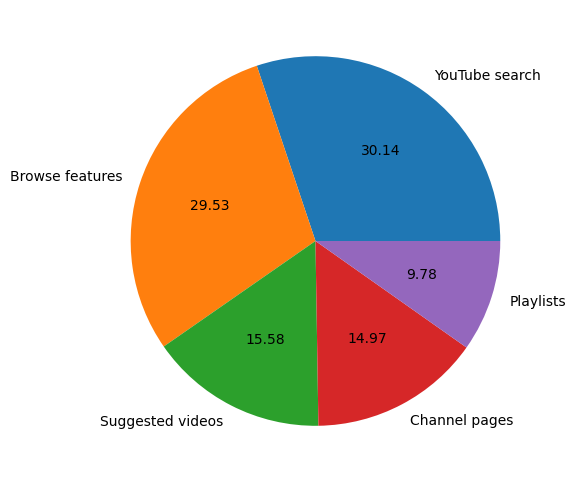

In [ ]:
# Pie chart:

plt.figure(figsize=(10,6))
plt.pie(ctr_traffic['Impressions click-through rate (%)'],autopct='%.2f',labels=ctr_traffic.index)
plt.show()

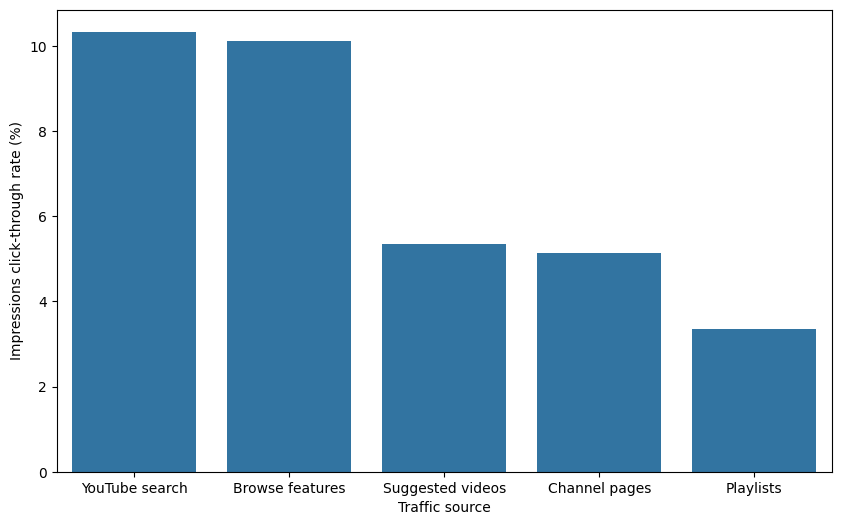

In [ ]:
# Bar chart:

plt.figure(figsize=(10,6))
sns.barplot(x=ctr_traffic.index,y=ctr_traffic['Impressions click-through rate (%)'])
plt.show()

In [ ]:
# We can conclude that we get high ctr when audience search for reqired content,
# we should focus more on attractive thumbnail, title and appropriate tags.

# Geographic analysis

In [ ]:
# Importing dataset:

geo = pd.read_csv("/content/drive/MyDrive/work files /YouTube analytics/Table data GEO.csv")

In [ ]:
# Printing dataset:

geo.head()

,Geography,Views,Watch time (hours),Average view duration
0,Total,1241569,49017.2105,0:02:22
1,IN,1231878,48511.0036,0:02:21
2,US,3071,193.8257,0:03:47
3,AE,585,28.5686,0:02:55
4,GB,497,21.2165,0:02:33


In [ ]:
# Dropping row:

geo=geo.drop(0)

In [ ]:
# Top 10 geo location with our audience:

geo_loc = geo.groupby('Geography')['Views'].sum().sort_values(ascending=False).reset_index().set_index('Geography').head()

In [ ]:
geo_loc

,Views
Geography,
IN,1231878
US,3071
AE,585
GB,497
CA,353


<Axes: xlabel='Geography', ylabel='Views'>

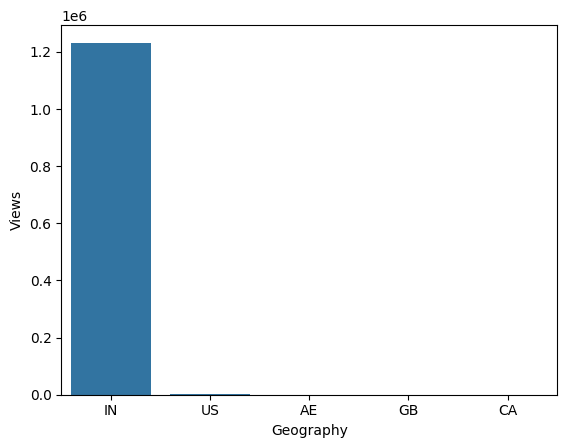

In [ ]:
# Bar chart:

sns.barplot(x=geo_loc.index,y=geo_loc['Views'])

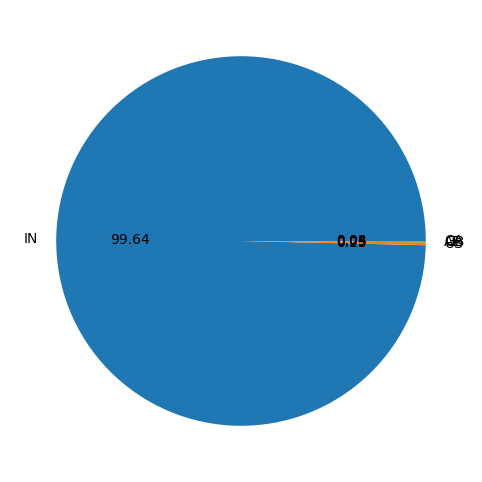

In [ ]:
# Pie chart:

plt.figure(figsize=(10,6))
plt.pie(geo_loc['Views'],autopct='%.2f',labels=geo_loc.index)
plt.show()

In [ ]:
# We can conclude that 99% of our audience is from india, so we should focus more on content related to indian audience.

# city analysis

In [ ]:
# Loading dataset:

city = pd.read_csv("/content/drive/MyDrive/work files /YouTube analytics/Table data CITY.csv")

In [ ]:
# Printing dataset:

city.head()

,Cities,City name,Geography,Geography.1,Views,Watch time (hours),Average view duration
0,Total,NaN,NaN,NaN,1241569,49017.2105,0:02:22
1,0x3bc2bf2e67461101:0x828d43bf9d9ee343,Pune,IN,IN-MH,544353,23008.6197,0:02:32
2,0x3bd4c0a5a31faf13:0x19b37d06d0bb3e2b,Nagpur,IN,IN-MH,192532,6839.8658,0:02:07
3,0x3be7c6306644edc1:0x5da4ed8f8d648c69,Mumbai,IN,IN-MH,106395,3589.9336,0:02:01
4,0x3bc2b8377fbdeab3:0x2c4265dab1a7a0f8,Pimpri-Chinchwad,IN,IN-MH,37749,1876.7470,0:02:58


In [ ]:
# from which city do we get highest views:

city_views = city.groupby('City name')['Views'].sum().sort_values(ascending=False).reset_index().set_index('City name').head()
city_views

,Views
City name,
Pune,544353
Nagpur,192532
Mumbai,106395
Pimpri-Chinchwad,37749
Nashik,16223


In [ ]:
# We can see that most of our viewer are from pune, nagpur , mumbai , pimpri-chinchwad, and nashik
# Host can try to show market of nagpur,mumbai and other cities from which channel gets highest views.
# By doing this channel can get more views.

# Age analysis

In [ ]:
# Loading dataset:

age = pd.read_csv("/content/drive/MyDrive/work files /YouTube analytics/Table data AGE.csv")

In [ ]:
# Printing dataset:

age

,Viewer age,Views (%),Average view duration,Average percentage viewed (%),Watch time (hours) (%)
0,13–17 years,1.68,0:02:12,14.94,1.60
1,18–24 years,9.00,0:02:05,13.87,8.12
2,25–34 years,21.40,0:02:10,12.78,20.09
3,35–44 years,23.07,0:02:19,13.56,23.14
4,45–54 years,22.26,0:02:23,14.53,23.04
5,55–64 years,15.16,0:02:26,14.59,15.97
6,65+ years,7.45,0:02:29,14.81,8.04


In [ ]:
# Views in percentage wrt viewers age:

age_views = age.groupby('Viewer age')['Views (%)'].sum().sort_values(ascending=False).reset_index().set_index('Viewer age')
age_views

,Views (%)
Viewer age,
35–44 years,23.07
45–54 years,22.26
25–34 years,21.40
55–64 years,15.16
18–24 years,9.00
65+ years,7.45
13–17 years,1.68


<Axes: xlabel='Viewer age', ylabel='Views (%)'>

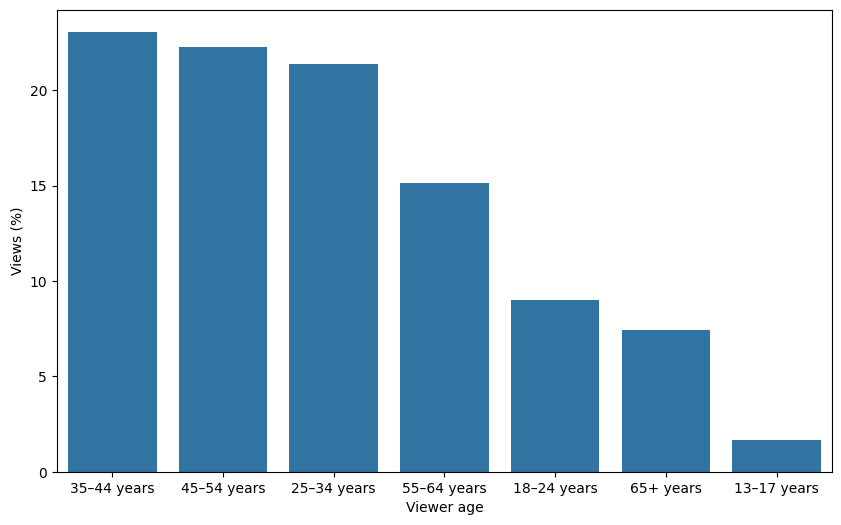

In [ ]:
# Bar chart:

plt.figure(figsize=(10,6))
sns.barplot(data=age_views,x=age_views.index,y='Views (%)')

In [ ]:
# Maximum viewers lie in age group of 35-54 so content should be curated for audience of this age group.
# Means - no hard language, simple explaination,less techincal content , more value content should be provided.

# Gender analysis

In [ ]:
# Dataset loading:

gender = pd.read_csv("/content/drive/MyDrive/work files /YouTube analytics/Table data GENDER.csv")

In [ ]:
# Dataset first view:

gender.head()

,Viewer gender,Views (%),Average view duration,Average percentage viewed (%),Watch time (hours) (%)
0,Female,58.57,0:02:20,13.27,59.32
1,Male,41.26,0:02:15,14.80,40.48
2,User specified,0.16,0:02:41,13.63,0.19


In [ ]:
# Gender wise views
gen_views = gender.groupby('Viewer gender')['Views (%)'].sum().sort_values(ascending=False).reset_index().set_index('Viewer gender')
gen_views

,Views (%)
Viewer gender,
Female,58.57
Male,41.26
User specified,0.16


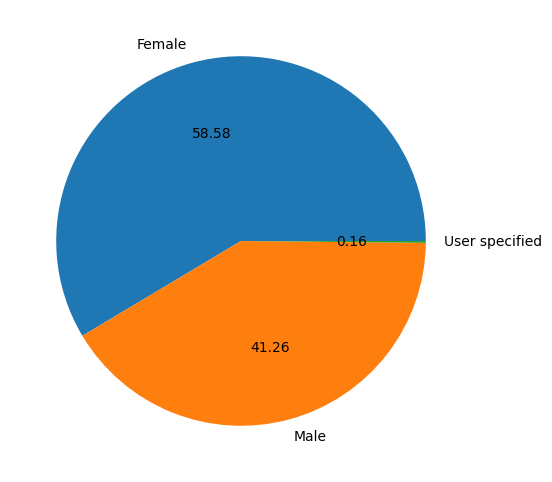

In [ ]:
# Pie chart:

plt.figure(figsize=(10,6))
plt.pie(gen_views['Views (%)'],autopct='%.2f',labels=gen_views.index)
plt.show()

In [ ]:
# We can conclude that 59 % audience is females and 42% of audience is males. Gender is kind of balanced
# so content should br relateble to both male and female audiences.

# revenue analysis

In [ ]:
# Loading dataset:

rev = pd.read_csv("/content/drive/MyDrive/work files /YouTube analytics/Table REVENUE.csv")

In [ ]:
# Data view:

rev.head()

,Revenue source,Estimated revenue (INR)
0,Total,24275.345
1,Watch page ads,24026.878
2,YouTube Premium,163.135
3,Shorts Feed ads,85.331


In [ ]:
# Dropping row:

rev = rev.drop(0)

In [ ]:
# Sorting values on basing of estimated revenue:

rev=rev.sort_values(by='Estimated revenue (INR)',ascending=False).reset_index()

<Axes: xlabel='Revenue source', ylabel='Estimated revenue (INR)'>

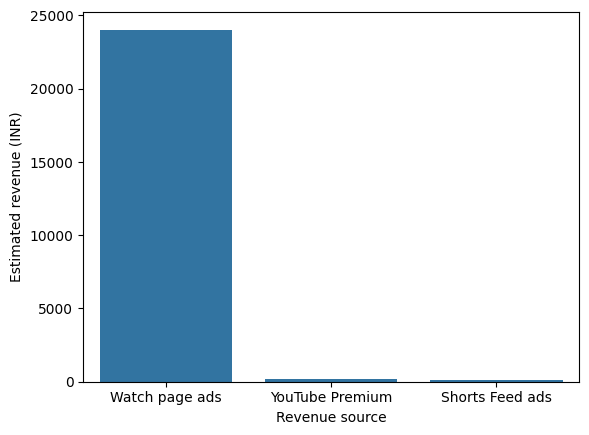

In [ ]:
sns.barplot(data=rev,x='Revenue source',y='Estimated revenue (INR)')

In [ ]:
#channel is genereating more revenue from ads!

# Conclusions:

We have gone through each aspect of data and derieved accurate insights:

Derived insights from content:

1. Year 2022 gained the highest views uptill now.
2. channel got a boom in year 2022
      reason:

        Video titled - " पुणे मध्ये या ठिकाणी मिळतील जाते, खलबत्ता, वाटणपाट, दगडी दिवा इ. स्वस्त दरात #marketnmuchmore #pune "
        gone viral which caused sudden rise in  viewers and subscribers and subsequently audience.
3. With this sudden boom we can say that channel audience takes liking towards street shopping. Creator can focus on streeet shopping content
4. " Best Ladies Shopee Hadapsar Pune / महिलांसाठी लागणारी सर्व खरेदी एकाच ठिकाणी #ladiesshopee #pune" video has highest Click- through rate
      Reason:

       High quality thumbnail,
       Content writing was good.

5. 1st, 4th, 7th and 8th month has reported highest views count.
6. Same month have reported significant increase in no. of new subscribers.

Traffic Source insights:

1. Maximum traffic is comming from Browse features and suggested videos.
2. Around 12% audience is comming from YouTube Search which gives a positive sign that channel is making its name in audience.
3. This paradigm also points to accuracy in choosing tags and title and quality of thumbnail and how popular creator is getting in audience. This accuracy can be increased and refined which will result in even more fast growth of face value.
4. YouTube Search has highest CTR.

Geography of audience:
1. 99% of audience is lies in india
2. In India highest no. of viewers are from cities like Pune, Nagpur, Mumbai.
3. Creator can also consider exploring markets of this cities which will give more views and reach.


Audience age insights:
1. Maximum of channnels audience lies in age group of 34-54.
2. Creator should curate the content according to relevency of this audience
3. Creator should focus more on value content, less techincal content and more simplified explaination.


Revenue insights:
1. Maximum revenue of channels is generated by watch page ads.
--> Creator can enable all kind of ads on channel to make more revenue.

